In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G1 = nx.DiGraph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)
G1.add_node(6)

In [3]:
G1.add_edge(1, 3)
G1.add_edge(1, 2)

G1.add_edge(2, 4)

G1.add_edge(3, 4)
G1.add_edge(3, 5)

G1.add_edge(4, 6)

G1.add_edge(5, 6)


G1[1][2]['capacity'] = 50
G1[1][3]['capacity'] = 40

G1[2][4]['capacity'] = 60

G1[3][4]['capacity'] = 70
G1[3][5]['capacity'] = 60

G1[4][6]['capacity'] = 30

G1[5][6]['capacity'] = 50

In [4]:
max_flow, arestas =  nx.maximum_flow(G1, 1, 6, capacity = 'capacity')

In [5]:
for node, edges in arestas.items():
    for target, weight in edges.items():
        G1[node][target]['fluxo_maximo'] =weight

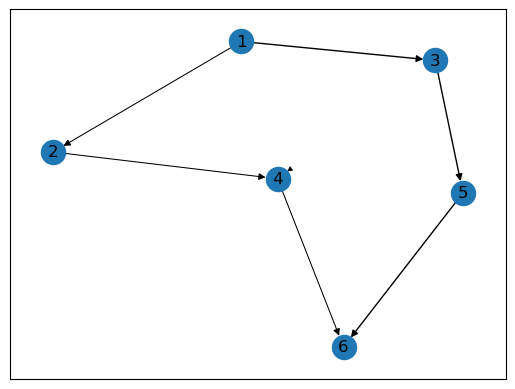

In [9]:
nx.draw_networkx(G1, 
                 width = max_fluxo_array/40)

### Rotina para calcular o fluxo máximo médio de cada aresta

In [10]:
def bfs(G, u):
    reachable_nodes = []
    visited = set()
    queue = [u]

    while queue:
        current_node = queue.pop(0)
        if current_node not in visited:
            visited.add(current_node)
            reachable_nodes.append(current_node)
            queue.extend(neighbor for neighbor in G[current_node] if neighbor not in visited)

    return reachable_nodes[1:]


In [11]:
bfs(G1, 1)

[3, 2, 4, 5, 6]

In [51]:
N = G1.order()
M = G1.size()

V = G1.nodes()
E = G1.edges()
#print(N, M, V)

i = 0
for u in V:
    for v in bfs(G1, u):
        max_flow, arestas =  nx.maximum_flow(G1, u, v, capacity = 'capacity')

        for node, edges in arestas.items():
            for target, weight in edges.items():
                G1[node][target]['fluxo_maximo'] = (G1[node][target]['fluxo_maximo'] + weight)/2

    
    i += 1
    print(i, max_flow)
    


1 70
2 30
3 80
4 30
5 50
6 50


In [30]:
G1.edges(data=True)

OutEdgeDataView([(1, 3, {'capacity': 40, 'fluxo_maximo': 0.29296875}), (1, 2, {'capacity': 50, 'fluxo_maximo': 0.19775390625}), (2, 4, {'capacity': 60, 'fluxo_maximo': 1.11083984375}), (3, 4, {'capacity': 70, 'fluxo_maximo': 5.9765625}), (3, 5, {'capacity': 60, 'fluxo_maximo': 10.244140625}), (4, 6, {'capacity': 30, 'fluxo_maximo': 11.84326171875}), (5, 6, {'capacity': 50, 'fluxo_maximo': 31.416015625})])

In [40]:
max_fluxo_array = []
for edge in G1.edges(data=True):
    print(edge)
    max_fluxo_array.append(edge[2]['fluxo_maximo'])

(1, 3, {'capacity': 40, 'fluxo_maximo': 0.28327465057373047})
(1, 2, {'capacity': 50, 'fluxo_maximo': 0.19047796726226807})
(2, 4, {'capacity': 60, 'fluxo_maximo': 1.103786826133728})
(3, 4, {'capacity': 70, 'fluxo_maximo': 5.978021621704102})
(3, 5, {'capacity': 60, 'fluxo_maximo': 10.236876010894775})
(4, 6, {'capacity': 30, 'fluxo_maximo': 11.838828921318054})
(5, 6, {'capacity': 50, 'fluxo_maximo': 31.413919925689697})


In [43]:
max_fluxo_array = np.array(max_fluxo_array)
np.sum(max_fluxo_array)

61.045185923576355

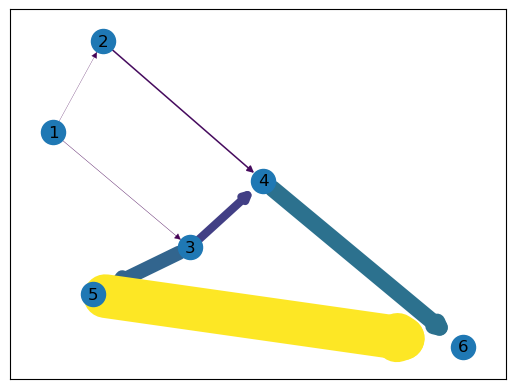

In [57]:
nx.draw_networkx(G1,
                 width = max_fluxo_array,
                 edge_color = max_fluxo_array,
                 edge_cmap = plt.cm.viridis)

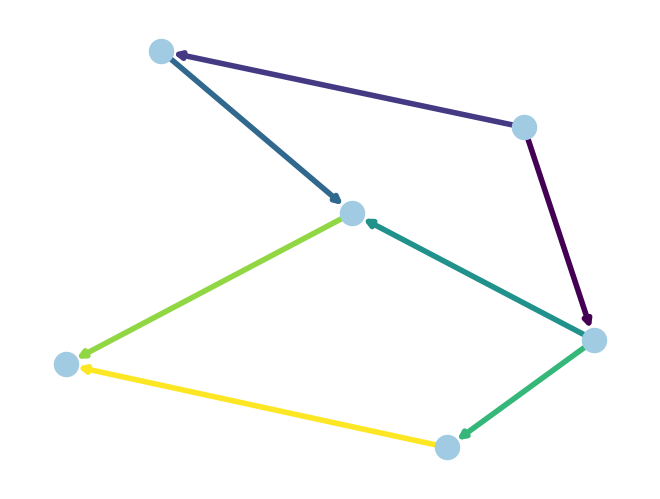

In [55]:
pos = nx.spring_layout(G1, seed=63)  # Seed layout for reproducibility
colors = range(7)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.viridis,
    "with_labels": False,
}
nx.draw(G1, pos, **options)
plt.show()